<a href="https://colab.research.google.com/github/Simran1475/Demo1/blob/main/Customers%20Review%20(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("/content/Restaurant_Reviews.tsv", sep = "\t")
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
df = pd.read_csv("/content/spam.tsv", sep = "\t")
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [6]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [8]:
df.describe()

,length,punct
count,5572.000000,5572.000000
mean,80.489950,4.177495
std,59.942907,4.623919
min,2.000000,0.000000
25%,36.000000,2.000000
50%,62.000000,3.000000
75%,122.000000,6.000000
max,910.000000,133.000000


In [10]:
df.shape

(5572, 4)

In [11]:
df ['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [14]:
ham = df [df ['label'] == 'ham']
ham.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
6,ham,Even my brother is not like to speak with me. ...,77,2


In [17]:
spam = df [df ['label'] =='spam']
spam.head()

,label,message,length,punct
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2
11,spam,"SIX chances to win CASH! From 100 to 20,000 po...",136,8


In [18]:
ham.shape , spam.shape

((4825, 4), (747, 4))

In [19]:
ham = ham.sample(spam.shape[0])
ham.shape

(747, 4)

In [20]:
data = ham.append(spam, ignore_index = True)
data

<ipython-input-20-2293a14416c5>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = ham.append(spam, ignore_index = True)


,label,message,length,punct
0,ham,The gas station is like a block away from my h...,132,2
1,ham,Its not that time of the month nor mid of the ...,51,1
2,ham,Good afternoon sexy buns! How goes the job sea...,156,5
3,ham,Did u got that persons story,28,0
4,ham,Nt yet chikku..simple habba..hw abt u?,38,5
...,...,...,...,...
1489,spam,Want explicit SEX in 30 secs? Ring 02073162414...,90,3
1490,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,158,5
1491,spam,Had your contract mobile 11 Mnths? Latest Moto...,160,8
1492,spam,REMINDER FROM O2: To get 2.50 pounds free call...,147,3


In [21]:
data.shape

(1494, 4)

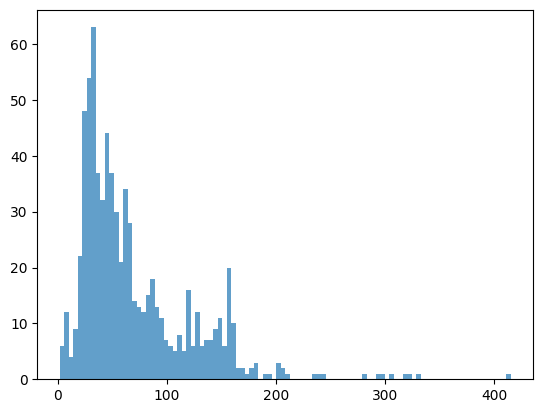

In [23]:
plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha =0.7)
plt.show()

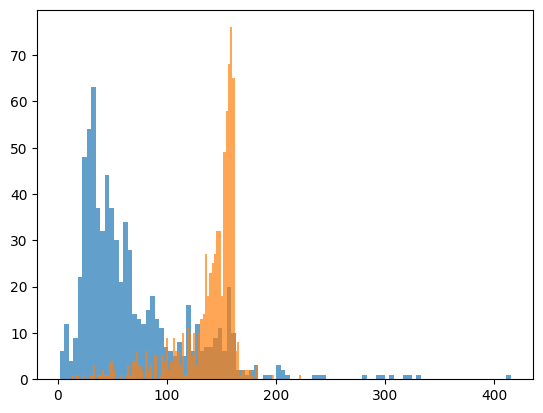

In [25]:
plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha =0.7)
plt.hist(data[data['label']=='spam']['length'], bins = 100, alpha =0.7)
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(data['message'],data['label'],test_size =0.3, random_state = 0,
                                                    shuffle =True)

In [29]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1045,) (1045,)
(449,) (449,)


In [39]:
x_train

1438      You have 1 new message. Please call 08715205273
431                             She doesnt need any test.
194                 You all ready for * big day tomorrow?
240           S.this will increase the chance of winning.
1309    Had your mobile 11 months or more? U R entitle...
                              ...                        
763     Your free ringtone is waiting to be collected....
835     XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
1216    Dorothy@kiefer.com (Bank of Granite issues Str...
559                   Uncle Abbey! Happy New Year. Abiola
684     So ü pay first lar... Then when is da stock co...
Name: message, Length: 1045, dtype: object

0       The gas station is like a block away from my h...
1       Its not that time of the month nor mid of the ...
2       Good afternoon sexy buns! How goes the job sea...
3                            Did u got that persons story
4                  Nt yet chikku..simple habba..hw abt u?
                              ...                        
1489    Want explicit SEX in 30 secs? Ring 02073162414...
1490    ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
1491    Had your contract mobile 11 Mnths? Latest Moto...
1492    REMINDER FROM O2: To get 2.50 pounds free call...
1493    This is the 2nd time we have tried 2 contact u...
Name: message, Length: 1494, dtype: object

In [40]:
y_train

1438    spam
431      ham
194      ham
240      ham
1309    spam
        ... 
763     spam
835     spam
1216    spam
559      ham
684      ham
Name: label, Length: 1045, dtype: object

In [41]:
x_test

799     Ur cash-balance is currently 500 pounds - to m...
1047    FreeMsg: Hey - I'm Buffy. 25 and love to satis...
1436    TheMob>Hit the link to get a premium Pink Pant...
54      The world's most happiest frnds never have the...
793     Think ur smart ? Win £200 this week in our wee...
                              ...                        
824     You will recieve your tone within the next 24h...
822     URGENT!: Your Mobile No. was awarded a £2,000 ...
644     aight we can pick some up, you open before ton...
1034    Sexy Singles are waiting for you! Text your AG...
1356    Congrats! 2 mobile 3G Videophones R yours. cal...
Name: message, Length: 449, dtype: object

In [42]:
y_test

799     spam
1047    spam
1436    spam
54       ham
793     spam
        ... 
824     spam
822     spam
644      ham
1034    spam
1356    spam
Name: label, Length: 449, dtype: object

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [47]:
classifier = Pipeline([('tfidf', TfidfVectorizer()) , ('classifier', RandomForestClassifier())])


In [48]:
classifier.fit(x_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
y_pred = classifier.predict(x_test)

In [54]:
accuracy_score(y_pred, y_test)

0.9443207126948775

In [55]:
confusion_matrix(y_test, y_pred)

array([[225,   2],
       [ 23, 199]])

In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.91      0.99      0.95       227
        spam       0.99      0.90      0.94       222

    accuracy                           0.94       449
   macro avg       0.95      0.94      0.94       449
weighted avg       0.95      0.94      0.94       449



In [59]:
classifier.predict(["hello, You are learning Natural Language Processing"])

array(['ham'], dtype=object)

In [60]:
classifier.predict(["Congratulation , You have won a lottery worth $10"])

array(['ham'], dtype=object)

In [61]:
classifier.predict(["Congratulation , You have won a lottery worth $1000000, contact 89898989"])

array(['ham'], dtype=object)